# [Scene Recognition with Bag-of-Words](https://www.cc.gatech.edu/~zlv30/courses/proj4.html)
For this project, you will need to report performance for three
combinations of features / classifiers. It is suggested you code them in
this order, as well:
1. Tiny image features and nearest neighbor classifier
2. Bag of sift features and nearest neighbor classifier
3. Bag of sift features and linear SVM classifier

The starter code is initialized to 'placeholder' just so that the starter
code does not crash when run unmodified and you can get a preview of how
results are presented.

## Setup

In [1]:
# Set up parameters, image paths and category list
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import os.path as osp
import pickle
from random import shuffle
import matplotlib.pyplot as plt
from utils import *
import student_code as sc

#additional toolboxes
np.random.seed(1)
from mpl_toolkits.mplot3d import Axes3D

# This is the list of categories / directories to use. The categories are
# somewhat sorted by similarity so that the confusion matrix looks more
# structured (indoor and then urban and then rural).
categories = ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 'Industrial', 'Suburb',
              'InsideCity', 'TallBuilding', 'Street', 'Highway', 'OpenCountry', 'Coast',
              'Mountain', 'Forest'];
# This list of shortened category names is used later for visualization
abbr_categories = ['Kit', 'Sto', 'Bed', 'Liv', 'Off', 'Ind', 'Sub',
                   'Cty', 'Bld', 'St', 'HW', 'OC', 'Cst',
                   'Mnt', 'For'];

# Number of training examples per category to use. Max is 100. For
# simplicity, we assume this is the number of test cases per category, as
# well.
num_train_per_cat = 100

# This function returns lists containing the file path for each train
# and test image, as well as lists with the label of each train and
# test image. By default all four of these lists will have 1500 elements
# where each element is a string.
data_path = osp.join('..', 'data')
train_image_paths, test_image_paths, train_labels, test_labels = get_image_paths(data_path,
                                                                                 categories,
                                                                                 num_train_per_cat);

## Section 1: Tiny Image features with Nearest Neighbor classifier

### Section 1a: Represent each image with the Tiny Image feature

Each function to construct features should return an N x d numpy array, where N is the number of paths passed to the function and d is the dimensionality of each image representation. See the starter code for each function for more details.

In [2]:
print('Using the TINY IMAGE representation for images')

train_image_feats_tiny_images = sc.get_tiny_images(train_image_paths)
test_image_feats_tiny_images = sc.get_tiny_images(test_image_paths)

Using the TINY IMAGE representation for images


### Section 1b: Classify each test image by training and using the Nearest Neighbor classifier

Each function to classify test features will return an N element list, where N is the number of test cases and each entry is a string indicating the predicted category for each test image. Each entry in 'predicted_categories' must be one of the 15 strings in 'categories', 'train_labels', and 'test_labels'. See the starter code for each function for more details.

In [3]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')

predicted_categories = sc.nearest_neighbor_classify(train_image_feats_tiny_images, train_labels, 
                                                    test_image_feats_tiny_images)

Using NEAREST NEIGHBOR classifier to predict test set categories


### Section 1c: Build a confusion matrix and score the recognition system

(You do not need to code anything in this section.)

If we wanted to evaluate our recognition method properly we would train
and test on many random splits of the data. You are not required to do so
for this project.

This function will create a confusion matrix and various image
thumbnails each time it is called. View the confusion matrix to help interpret
your classifier performance. Where is it making mistakes? Are the
confusions reasonable?

Interpreting your performance with 100 training examples per category:
- accuracy  =   0 -> Your code is broken (probably not the classifier's fault! A classifier would have to be amazing to perform this badly).
- accuracy ~= .07 -> Your performance is chance. Something is broken or you ran the starter code unchanged.
- accuracy ~= .20 -> Rough performance with tiny images and nearest neighbor classifier. Performance goes up a few percentage points with K-NN instead of 1-NN.
- accuracy ~= .20 -> Rough performance with tiny images and linear SVM classifier. The linear classifiers will have a lot of trouble trying to separate the classes and may be unstable (e.g. everything classified to one category)
- accuracy ~= .50 -> Rough performance with bag of SIFT and nearest neighbor classifier. Can reach .60 with K-NN and different distance metrics.
- accuracy ~= .60 -> You've gotten things roughly correct with bag of SIFT and a linear SVM classifier.
- accuracy >= .70 -> You've also tuned your parameters well. E.g. number of clusters, SVM regularization, number of patches sampled when building vocabulary, size and step for dense SIFT features.
- accuracy >= .80 -> You've added in spatial information somehow or you've added additional, complementary image features. This represents state of the art in Lazebnik et al 2006.
- accuracy >= .85 -> You've done extremely well. This is the state of the art in the 2010 SUN database paper from fusing many  features. Don't trust this number unless you actually measure many random splits.
- accuracy >= .90 -> You used modern deep features trained on much larger image databases.
- accuracy >= .96 -> You can beat a human at this task. This isn't a realistic number. Some accuracy calculation is broken or your classifier is cheating and seeing the test labels.

<IPython.core.display.Javascript object>


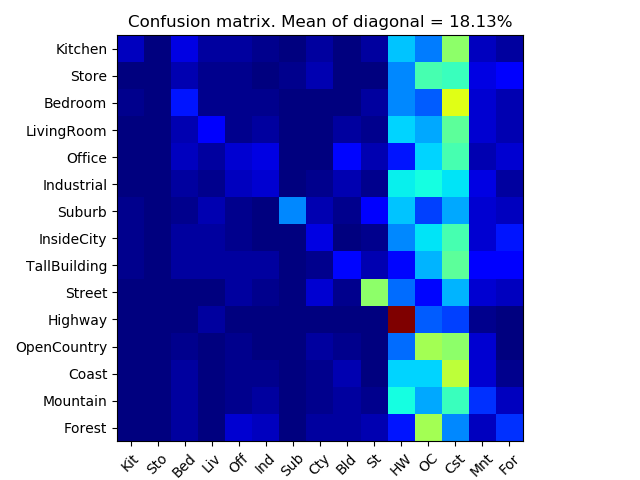

In [4]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Section 2: Bag of SIFT features with Nearest Neighbor classifier

### Section 2a: Represent each image with the Bag of SIFT feature

To create a new vocabulary, make sure `vocab_filename` is different than the old vocabulary, or delete the old one.

In [5]:
print('Using the BAG-OF-SIFT representation for images')

vocab_filename = 'vocab.pkl'
if not osp.isfile(vocab_filename):
    # Construct the vocabulary
    print('No existing visual word vocabularyound. Computing one from training images')
    vocab_size = 200  # Larger values will work better (to a point) but be slower to compute
    vocab = sc.build_vocabulary(train_image_paths, vocab_size)
    with open(vocab_filename, 'wb') as f:
        pickle.dump(vocab, f)
        print('{:s} saved'.format(vocab_filename))

train_image_feats = sc.get_bags_of_sifts(train_image_paths, vocab_filename)
test_image_feats = sc.get_bags_of_sifts(test_image_paths, vocab_filename)

Using the BAG-OF-SIFT representation for images


### Section 2b: Classify each test image by training and using the Nearest Neighbor classifier

In [6]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = sc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats)

Using NEAREST NEIGHBOR classifier to predict test set categories


### Section 2c: Build a confusion matrix and score the recognition system

<IPython.core.display.Javascript object>


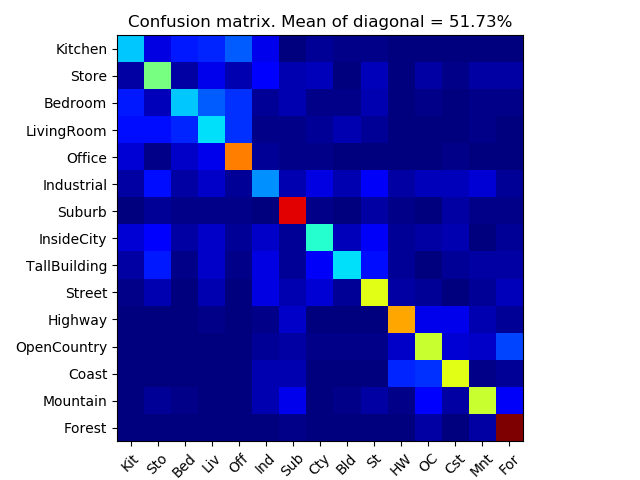

In [7]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Section 3: Bag of SIFT features and SVM classifier
We will reuse the bag of SIFT features from Section 2a.

The difference is that this time we will classify them with a support vector machine (SVM).

### Section 3a: Classify each test image by training and using the SVM classifiers

In [8]:
print('Using SVM classifier to predict test set categories')
predicted_categories = sc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories


### Section 3b: Build a confusion matrix and score the recognition system

<IPython.core.display.Javascript object>


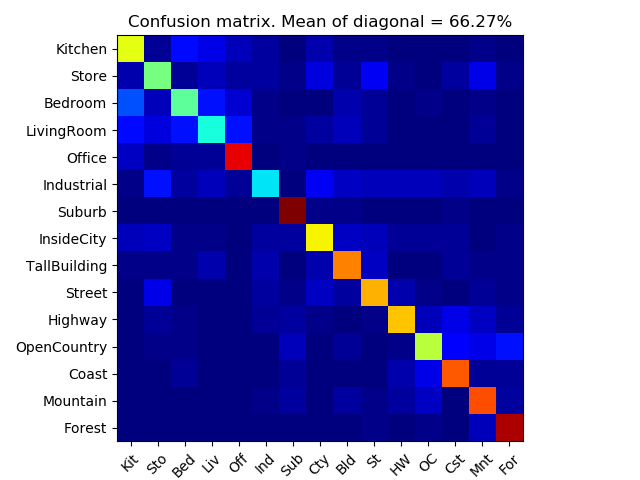

In [9]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

# Analysis

#### 1) Describe your Tiny image feature classification pipeline ? Compare the confusion matrix using two different values of k in KNN. Try different distance matrix apart from euclidian distance and illustrate the impact of it on overall result. (4 points)

Add your description here

In [10]:
# Code

In [11]:
k_score, k_range = [], [1,2,3,5,10,20,50]
for k in k_range:
    predicted_categories = sc.nearest_neighbor_classify(train_image_feats_tiny_images, train_labels, 
                                                        test_image_feats_tiny_images, k=k)
    acc = sc.confusion_matrix_accuracy(predicted_categories,test_labels,categories)
    k_score.append(acc)

<IPython.core.display.Javascript object>


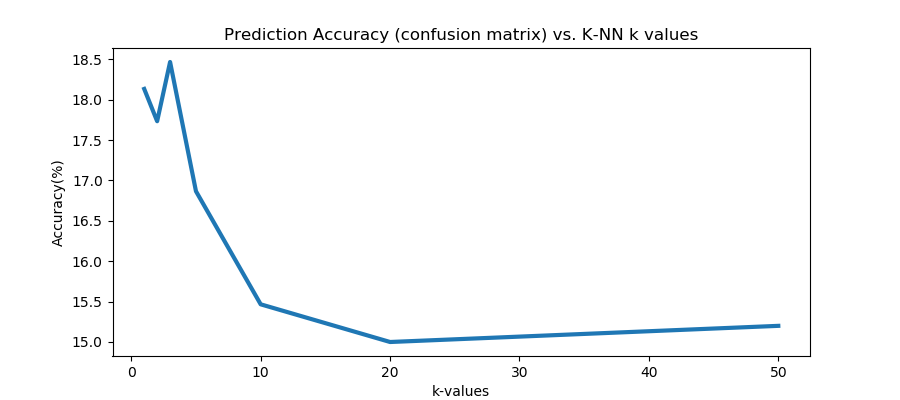

In [12]:
fig, ax = plt.subplots(1,1,figsize=(9,4))
ax.plot(k_range, k_score, linewidth = 3)
ax.set_xlabel('k-values');ax.set_ylabel('Accuracy(%)');
plt.title('Prediction Accuracy (confusion matrix) vs. K-NN k values'); plt.show();

#### 2) How you build your Bag of SIFT features representation ? (2 points)

+ Import all the image, and use `vlfeat` to calculate `descriptors`
+ I manually calculate the `nearest centers` from each `descriptors` by using the `pairwise distance` from all descriptors to all vocab. The indexes with smallest distance is selected (`np.argmin`). This index indicates the label of nearest center
+ Construct the histogram by using `np.bincount` to count the number of occurance of each centers in vocab. `minlength = len(vocab)` to make sure that all the dimensions are updated.
+ Normalize the histogram and append to the feats

#### 3) Describe your SVM classification pipeline? Compare the results of Nearest Neighbor classifier and SVM classifer. (2 points)

+ Loop over each categories
+ Create label 'Yes = 1, 'No = -1' if an image of the trainning set belongs/not belong to the given categories
+ Fit SVM model to the data and append the calculated W = coeff_ and C =intercept_ of the model
+ Next is used these models to calculate the `confident score`. From each test image, the bag_of_sift vectors\*W +C to all the classes. Use `np.argmax` to choose the most confident class as the prediction for test image

+ k-NN achieves 51% while SVM achieves 62% accuracy

#### 4) Describe k-fold cross validation ? why validation test set is important ? (2 points)

+ k-fold is to divide the training set into train and validataion sets. 
+ We use the validation set as unseen data to examine the generalization of learning. 
+ This evaludates overfitting, bias variance trade-off. 

In [13]:
from sklearn.model_selection import KFold

In [14]:
val_score,test_score, k_fold = [],[], 10

kf = KFold(n_splits=k_fold, random_state=None, shuffle=True)


for train_index, val_index in kf.split(train_image_feats):
    train_data, val_data =  train_image_feats[train_index], train_image_feats[val_index]
    train_y, val_y = np.array(train_labels)[train_index], np.array(train_labels)[val_index] 
    
    predicted_val_categories = sc.svm_classify(train_data,train_y, val_data)
    
    val_acc = sc.confusion_matrix_accuracy(predicted_val_categories,val_y,categories)
    val_score.append(val_acc)
    
    predicted_categories = sc.svm_classify(train_data,train_y, test_image_feats)
    test_acc = sc.confusion_matrix_accuracy(predicted_categories,test_labels,categories)
    test_score.append(test_acc)

val_score, test_score = np.array(val_score), np.array(test_score)
print('Validation mean = %.2f, Validation standard deviarion = %.2f' %(np.mean(val_score), np.std(val_score)))
print('Test mean = %.2f, Test standard deviarion = %.2f' %(np.mean(test_score), np.std(test_score)))

Validation mean = 64.73, Validation standard deviarion = 3.13
Test mean = 65.57, Test standard deviarion = 0.56


<IPython.core.display.Javascript object>


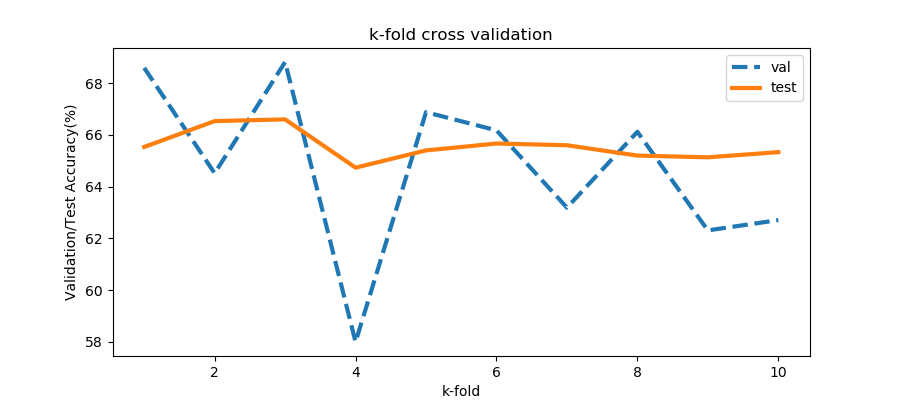

In [15]:
fig, ax = plt.subplots(1,1,figsize=(9,4))
ax.plot(range(1,k_fold+1), val_score,'--', linewidth = 3)
ax.plot(range(1,k_fold+1), test_score, linewidth = 3)
ax.set_xlabel('k-fold');ax.set_ylabel('Validation/Test Accuracy(%)'); ax.legend(['val','test'])
plt.title('k-fold cross validation'); plt.show();

#### 5) Detailed quantitative analysis showing the impact of two different hyperparameters on overall results? Describe how you tuned them? Illustrate using examples. (8 points)

+ I sweep the loss_function, tol_range, C_range to find the test_score. Best parametters is printed out, and a 3D plot with various performance of hyperparameters are presented.

+ Linear SVC is quite independent on the parameter 'tol'

+ Best accuracy is achieved with 'Squared_hingle' loss, C = 0.5

In [16]:
test_score, best_score, best_param = {}, -1, []
loss_func = ['hinge', 'squared_hinge']
#loss_func = 'hinge'
tol_range = [1e-4,5e-4,1e-3,5e-3]
C_range = [0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,2]

for func in loss_func:
    for tol in tol_range:
        print('Loss_func = %s tol = %f,...' %(func, tol))
        for C in C_range:
            predicted_categories = sc.svm_classify(train_image_feats, train_labels, test_image_feats,
                                                  tol=tol, loss=func, C=C)
            score = sc.confusion_matrix_accuracy(predicted_categories,test_labels,categories)
            test_score[(func,tol,C)] = score
            if score>best_score:
                best_score, best_param = score, [func,tol,C]

print('Best Test Score = %.2f -- with Loss_func = %s, tol = %f, C = %f' \
     %(best_score, best_param[0],best_param[1],best_param[2]))

Loss_func = hinge tol = 0.000100,...


C:\Users\huyth\Miniconda3\envs\cs4476p4\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\huyth\Miniconda3\envs\cs4476p4\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Loss_func = hinge tol = 0.000500,...
Loss_func = hinge tol = 0.001000,...
Loss_func = hinge tol = 0.005000,...
Loss_func = squared_hinge tol = 0.000100,...
Loss_func = squared_hinge tol = 0.000500,...
Loss_func = squared_hinge tol = 0.001000,...
Loss_func = squared_hinge tol = 0.005000,...
Best Test Score = 66.27 -- with Loss_func = squared_hinge, tol = 0.000100, C = 0.500000


In [17]:
def extract_grid(test_score,cat = 'hinge'):
    Matrix = [[tol,C,score]for (func,tol,C), score in test_score.items() if func == cat]
    Matrix.sort(key = lambda x: (x[0],x[1]))
    if Matrix:
        Matrix = np.array(Matrix)
        x0,x1,y = Matrix[:,0],Matrix[:,1],Matrix[:,2]
        R,C = len(set(x0)),len(set(x1))
        return x0.reshape(R,C), x1.reshape(R,C), y.reshape(R,C)
    else:
        return [],[],[]

<IPython.core.display.Javascript object>


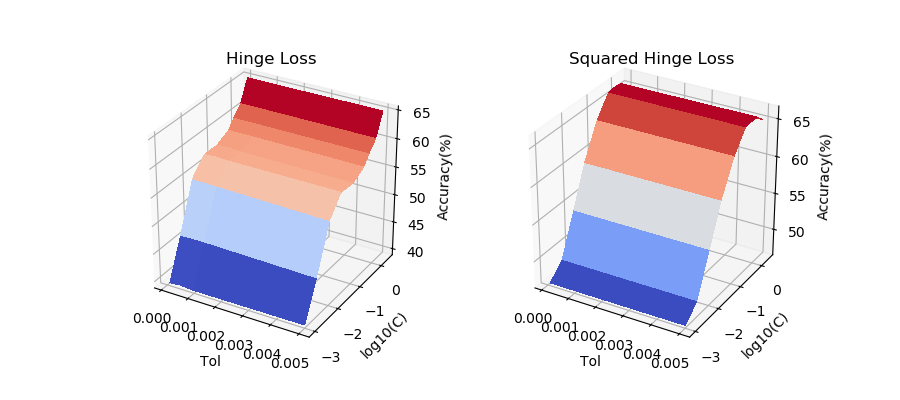

In [18]:
fig = plt.figure(figsize=(9,4))

ax11=fig.add_subplot(121,projection='3d')
X, Y, Z = extract_grid(test_score,cat = 'hinge')
ax11.plot_surface(X, np.log10(Y), Z, cmap=plt.cm.coolwarm, linewidth=2, antialiased=False)
ax11.set_title('Hinge Loss')
ax11.set_xlabel('Tol'); ax11.set_ylabel('log10(C)'), ax11.set_zlabel('Accuracy(%)')

ax11=fig.add_subplot(122,projection='3d')
X, Y, Z = extract_grid(test_score,cat = 'squared_hinge')
ax11.plot_surface(X, np.log10(Y), Z, cmap=plt.cm.coolwarm, linewidth=2, antialiased=False)
ax11.set_title('Squared Hinge Loss')
ax11.set_xlabel('Tol'); ax11.set_ylabel('log10(C)'), ax11.set_zlabel('Accuracy(%)')
plt.show()

Use cross-validation to measure performance rather than the fixed test / train split provided by the starter code. Randomly pick 100 training and 100 testing images for each iteration and report average performance and standard deviations.

Add a validation set to your training process to tune learning parameters. This validation set could either be a subset of the training set or some of the otherwise unused test set.

## Sweeping the vocab_size and report performance (long running time...)

Experiment with many different vocabulary sizes and report performance. E.g. 10, 20, 50, 100, 200, 400, 1000, 10000.

Only slight improvement is observed with vocab_size>200 

In [19]:
def sweeping_vocab_size(func, vocab_size_range):
    test_score = []
    for vocab_size in vocab_size_range:
        print('vocab_size = %s ...' %(str(vocab_size)))
        vocab_filename = 'vocab_{}.pkl'.format(vocab_size)
        if not osp.isfile(vocab_filename):
            vocab = sc.build_vocabulary(train_image_paths, vocab_size)
            with open(vocab_filename, 'wb') as f:
                pickle.dump(vocab, f)
                print('{:s} saved'.format(vocab_filename))
        train_image_feats = func(train_image_paths, vocab_filename)
        test_image_feats = func(test_image_paths, vocab_filename)

        predicted_categories = sc.svm_classify(train_image_feats, train_labels, test_image_feats,
                                                      tol=1e-2, loss='squared_hinge', C=0.5)
        score = sc.confusion_matrix_accuracy(predicted_categories,test_labels,categories)
        test_score.append(score)
    return test_score

In [20]:
vocab_size_range = [20,50,100,200,500,1000]
test_score= sweeping_vocab_size(sc.get_bags_of_sifts, vocab_size_range)

vocab_size = 20 ...
vocab_size = 50 ...
vocab_size = 100 ...
vocab_size = 200 ...
vocab_size = 500 ...
vocab_size = 1000 ...


<IPython.core.display.Javascript object>


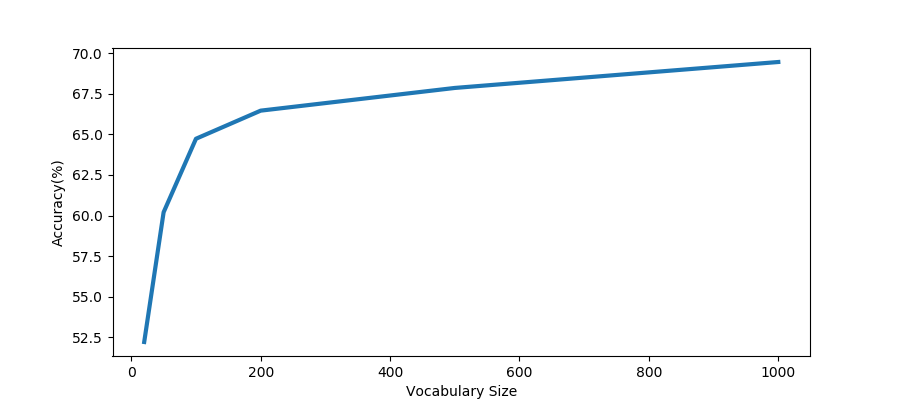

In [21]:
fig, ax = plt.subplots(1,1,figsize=(9,4))
ax.plot(vocab_size_range, test_score, linewidth = 3)
ax.set_xlabel('Vocabulary Size');ax.set_ylabel('Accuracy(%)'); plt.show()

# Extra Credit:- Bells and Whistles (Optional)

For all extra credit, be sure to include quantitative analysis showing the impact of the particular method you've implemented. Each item is "up to" some amount of points because trivial implementations may not be worthy of full extra credit. Most of the extra credit focuses on the final bag of words + SVM pipeline of the project, not the baseline tiny image and nearest neighbor methods.

## Feature representation extra credit:

+ up to 10 pts: Experiment with features at multiple scales. E.g. sampling features from different levels of a Gaussian pyramid.

## Feature quantization and bag of words extra credit:

+ up to 10 pts: Use "soft assignment" to assign visual words to histogram bins. Each visual word will cast a distance-weighted vote to multiple bins. This is called "kernel codebook encoding" by Chatfield et al..

## Classifier extra credit:

+ up to 10 pts: Train the SVM with more sophisticated kernels such as Gaussian/RBF, L1, or chi-sqr. Try using the 'kernel' and 'gamma' arguments in scikit-learn's SVC method.
+ up to 10 pts: Try and improve the nearest neighbor classifier to be competitive or better than the linear SVM using the method of Boiman, Schechtman, and Irani, CVPR 2008.

## Extra Credit 1 (Optional):- SVM with more sophisticated kernels

+ I run the SVM classifiers with RBF, Poly, Sigmoid, and Precomputed kernels

+ RBF Kernel can achive 68.8% (best I can get = 70%)

+ Poly Kernel can achive 68.7% (best I can get = 70.7%)

+ Sigmoid Kernel can achive 65.4%

In [22]:
vocab_filename = 'vocab.pkl'
train_image_feats = sc.get_bags_of_sifts(train_image_paths, vocab_filename)
test_image_feats = sc.get_bags_of_sifts(test_image_paths, vocab_filename)

## RBF Kernel

Using rbf kernel:


<IPython.core.display.Javascript object>


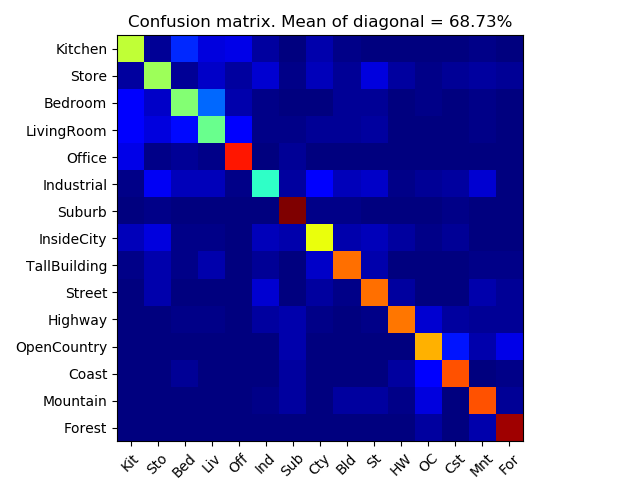

In [23]:
kernel = 'rbf'
print('Using %s kernel:' %kernel)
predicted_categories = sc.svm_kernel(train_image_feats, train_labels, test_image_feats,
                                     kernel = kernel, gamma = 1, C=5)
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Poly Kernel

Using poly kernel:


<IPython.core.display.Javascript object>


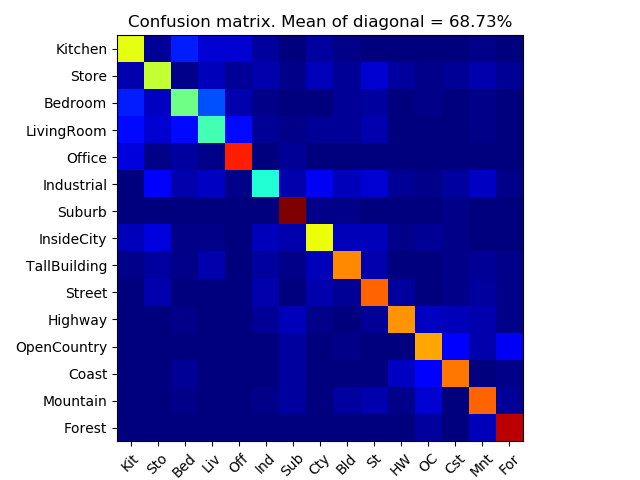

In [24]:
kernel = 'poly'
print('Using %s kernel:' %kernel)
predicted_categories = sc.svm_kernel(train_image_feats, train_labels, test_image_feats,
                                     kernel = kernel, gamma = 1, C=2)
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Sigmoid Kernel

Using sigmoid kernel:


<IPython.core.display.Javascript object>


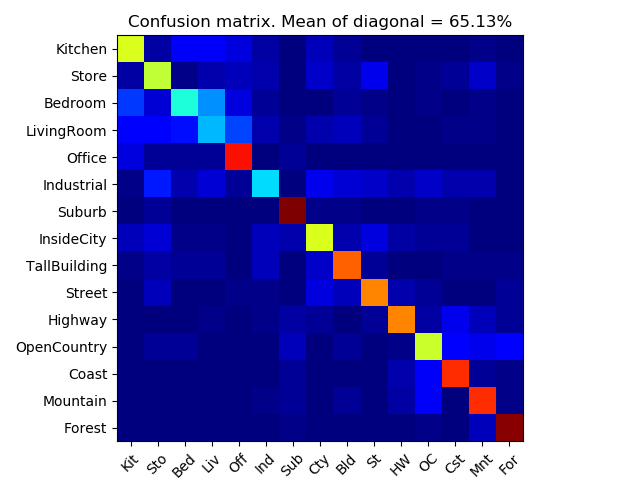

In [25]:
kernel = 'sigmoid'
print('Using %s kernel:' %kernel)
predicted_categories = sc.svm_kernel(train_image_feats, train_labels, test_image_feats,
                                     kernel = kernel, gamma = 0.1, C=50)
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Quite comprehensive sweeping here, thus it takes some time to run
(5 mins in my computer?)

In [26]:
test_score = {}
kernel_choice = ['rbf', 'poly','sigmoid']
gamma_range = [1e-2,1e-1,1e0,1e1,1e2]
C_range = [0.01,0.03,0.1,0.3,1,2,5,8,15]

for kernel in kernel_choice:
    best_score, best_param = -1, []
    for gamma in gamma_range:
        print('Kernel = %s Gamma = %f,...' %(kernel, gamma))
        for C in C_range:
            predicted_categories = sc.svm_kernel(train_image_feats, train_labels, test_image_feats,
                                     kernel = kernel, gamma = gamma, C=C)
            score = sc.confusion_matrix_accuracy(predicted_categories,test_labels,categories)
            test_score[(kernel,gamma,C)] = score
            if score>best_score:
                best_score, best_param = score, [kernel,gamma,C]

    print('Best Test Score = %.2f -- with kernel = %s, gamma = %f, C = %f' \
         %(best_score, best_param[0],best_param[1],best_param[2]))

Kernel = rbf Gamma = 0.010000,...
Kernel = rbf Gamma = 0.100000,...
Kernel = rbf Gamma = 1.000000,...
Kernel = rbf Gamma = 10.000000,...
Kernel = rbf Gamma = 100.000000,...
Best Test Score = 68.87 -- with kernel = rbf, gamma = 1.000000, C = 8.000000
Kernel = poly Gamma = 0.010000,...
Kernel = poly Gamma = 0.100000,...
Kernel = poly Gamma = 1.000000,...
Kernel = poly Gamma = 10.000000,...
Kernel = poly Gamma = 100.000000,...
Best Test Score = 68.73 -- with kernel = poly, gamma = 1.000000, C = 2.000000
Kernel = sigmoid Gamma = 0.010000,...
Kernel = sigmoid Gamma = 0.100000,...
Kernel = sigmoid Gamma = 1.000000,...
Kernel = sigmoid Gamma = 10.000000,...
Kernel = sigmoid Gamma = 100.000000,...
Best Test Score = 64.33 -- with kernel = sigmoid, gamma = 0.100000, C = 15.000000


<IPython.core.display.Javascript object>


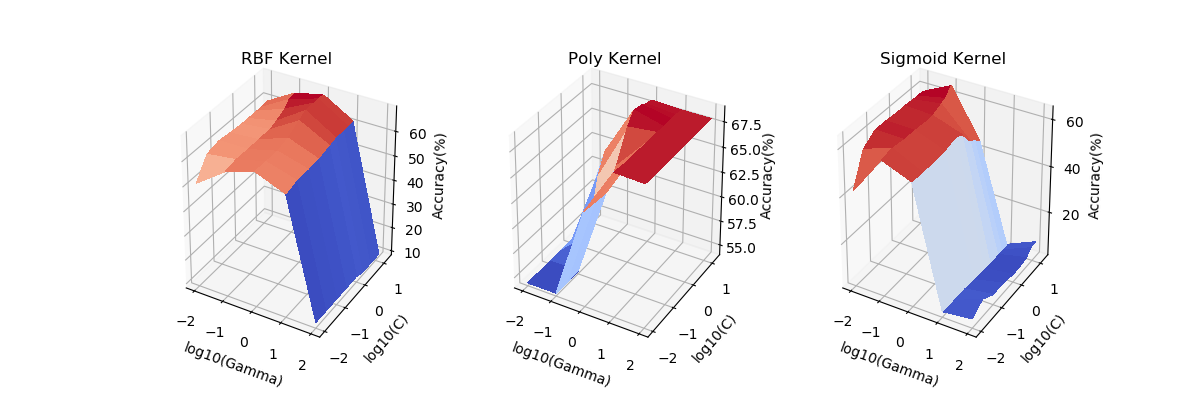

In [27]:
fig = plt.figure(figsize=(12,4))

ax11=fig.add_subplot(131,projection='3d')
X, Y, Z = extract_grid(test_score,cat = 'rbf')
ax11.plot_surface(np.log10(X), np.log10(Y), Z, cmap=plt.cm.coolwarm, linewidth=2, antialiased=False)
ax11.set_title('RBF Kernel')
ax11.set_xlabel('log10(Gamma)'); ax11.set_ylabel('log10(C)'), ax11.set_zlabel('Accuracy(%)')

ax12=fig.add_subplot(132,projection='3d')
X, Y, Z = extract_grid(test_score,cat = 'poly')
ax12.plot_surface(np.log10(X), np.log10(Y), Z, cmap=plt.cm.coolwarm, linewidth=2, antialiased=False)
ax12.set_title('Poly Kernel')
ax12.set_xlabel('log10(Gamma)'); ax12.set_ylabel('log10(C)'), ax12.set_zlabel('Accuracy(%)')

ax13=fig.add_subplot(133,projection='3d')
X, Y, Z = extract_grid(test_score,cat = 'sigmoid')
ax13.plot_surface(np.log10(X), np.log10(Y), Z, cmap=plt.cm.coolwarm, linewidth=2, antialiased=False)
ax13.set_title('Sigmoid Kernel')
ax13.set_xlabel('log10(Gamma)'); ax13.set_ylabel('log10(C)'), ax13.set_zlabel('Accuracy(%)')
plt.show()

## Extra Credit 2 (Optional):- kernel codebook encoding

Following the paper, I have implemented the kernel codebook encoding

+ Soft assignment of all the clusters
+ Sweep various value of gamma of the kernel codebook encoding
+ At each of these hypeparameter pairs, I use the `SVC Poly Kernel` to check the accuracy 

The kernel codebook encoding has been implemented in the `student_code`. The soft assignment is dependent on the value of gamma in the encode. The lower value of gamma, the softer the cluster assigment.

I want to see the effect of soft encoding here, so I sweep the value of this hyperparameter.

It seems that higher value of gamma achieves higher accuracy.

## Sweeping hyperparameters `gamma` of kernel codebook encoding

In [28]:
test_score = {}
encode_gamma_range = [0.001,0.01,0.1,1]
gamma_range = [1e-1,1e0,1e1,1e2]
C_range = [0.3,1,2,5,8,15]

for encode_gamma in encode_gamma_range:
    
    train_image_feats = sc.kernel_codebook_encoding(train_image_paths, 'vocab_200.pkl',gamma = encode_gamma)
    test_image_feats = sc.kernel_codebook_encoding(test_image_paths, 'vocab_200.pkl',gamma = encode_gamma)
    
    best_score, best_param = -1, []
    
    for gamma in gamma_range:
        print('encode_gamma = %s Gamma = %f,...' %(encode_gamma, gamma))
        for C in C_range:
            predicted_categories = sc.svm_kernel(train_image_feats, train_labels, test_image_feats,
                                     kernel = 'poly', gamma = gamma, C=C)
            score = sc.confusion_matrix_accuracy(predicted_categories,test_labels,categories)
            test_score[(encode_gamma,gamma,C)] = score
            if score>best_score:
                best_score, best_param = score, [encode_gamma,gamma,C]

    print('Best Test Score = %.2f -- with encode_gamma = %s, gamma = %f, C = %f' \
         %(best_score, best_param[0],best_param[1],best_param[2]))

encode_gamma = 0.001 Gamma = 0.100000,...
encode_gamma = 0.001 Gamma = 1.000000,...
encode_gamma = 0.001 Gamma = 10.000000,...
encode_gamma = 0.001 Gamma = 100.000000,...
Best Test Score = 64.67 -- with encode_gamma = 0.001, gamma = 100.000000, C = 2.000000
encode_gamma = 0.01 Gamma = 0.100000,...
encode_gamma = 0.01 Gamma = 1.000000,...
encode_gamma = 0.01 Gamma = 10.000000,...
encode_gamma = 0.01 Gamma = 100.000000,...
Best Test Score = 67.33 -- with encode_gamma = 0.01, gamma = 10.000000, C = 8.000000
encode_gamma = 0.1 Gamma = 0.100000,...
encode_gamma = 0.1 Gamma = 1.000000,...
encode_gamma = 0.1 Gamma = 10.000000,...
encode_gamma = 0.1 Gamma = 100.000000,...
Best Test Score = 68.07 -- with encode_gamma = 0.1, gamma = 1.000000, C = 2.000000
encode_gamma = 1 Gamma = 0.100000,...
encode_gamma = 1 Gamma = 1.000000,...
encode_gamma = 1 Gamma = 10.000000,...
encode_gamma = 1 Gamma = 100.000000,...
Best Test Score = 67.47 -- with encode_gamma = 1, gamma = 10.000000, C = 0.300000


<IPython.core.display.Javascript object>


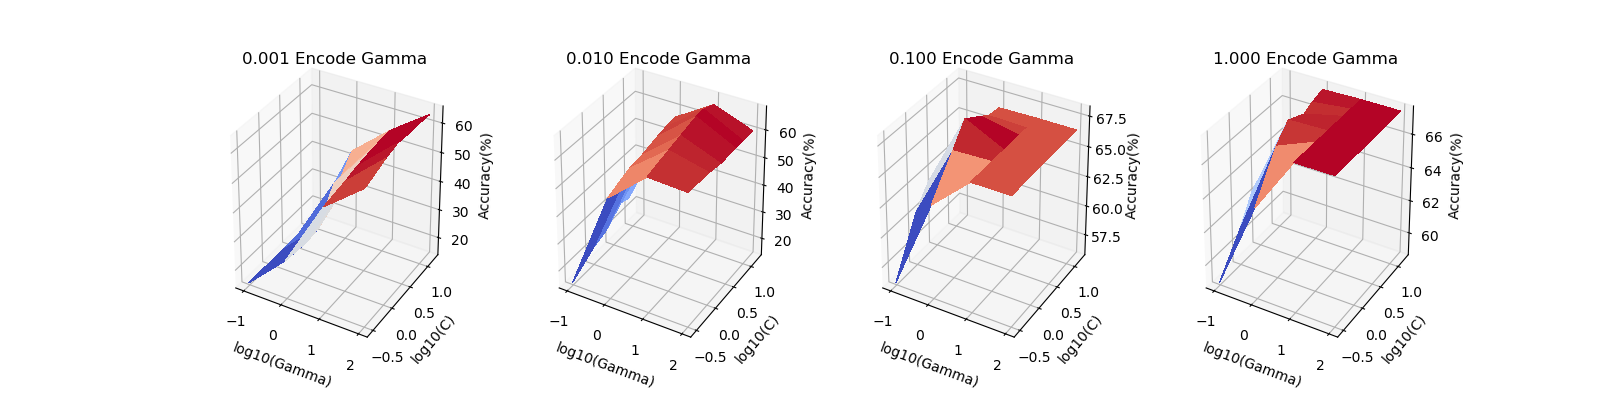

In [29]:
fig = plt.figure(figsize=(16,4))

for ii, val in enumerate(encode_gamma_range):
    ax11 = fig.add_subplot(1,4,ii+1,projection='3d')
    X, Y, Z = extract_grid(test_score,cat = val)
    ax11.plot_surface(np.log10(X), np.log10(Y), Z, cmap=plt.cm.coolwarm, linewidth=2, antialiased=False)
    ax11.set_title('%.3f Encode Gamma' %(val))
    ax11.set_xlabel('log10(Gamma)'); ax11.set_ylabel('log10(C)'), ax11.set_zlabel('Accuracy(%)')

## Sweeping vocab_size and C of linear SVC with kernel codebook encode

When vocab_size>99, the results is pretty independent of the vocab_size even with kernel codebook encode

In [30]:
test_score, best_score, best_param = {}, -1, []
func = 'squared_hinge'
C_range = [0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,2]
vocab_size_range = [20,50,100,200,500,1000]

for vocab_size in vocab_size_range:
    print('vocab_size = %s ...' %(str(vocab_size)))
    # Get the data with the vocab_size
    vocab_filename = 'vocab_{}.pkl'.format(vocab_size)
    train_image_feats = sc.kernel_codebook_encoding(train_image_paths, vocab_filename,gamma =1)
    test_image_feats = sc.kernel_codebook_encoding(test_image_paths, vocab_filename,gamma =1)

    for C in C_range:
        # Predict and run
        predicted_categories = sc.svm_classify(train_image_feats, train_labels, test_image_feats,
                                                      tol=1e-3, loss='squared_hinge', C=C)
        score = sc.confusion_matrix_accuracy(predicted_categories,test_labels,categories)
        test_score[(func,vocab_size,C)] = score
        if score>best_score:
            best_score, best_param = score, [func,vocab_size,C]

print('Best Test Score = %.2f -- with Loss_func = %s, vocab_size = %f, C = %f' \
     %(best_score, best_param[0],best_param[1],best_param[2]))

vocab_size = 20 ...
vocab_size = 50 ...
vocab_size = 100 ...
vocab_size = 200 ...
vocab_size = 500 ...
vocab_size = 1000 ...
Best Test Score = 69.07 -- with Loss_func = squared_hinge, vocab_size = 1000.000000, C = 0.500000


<IPython.core.display.Javascript object>


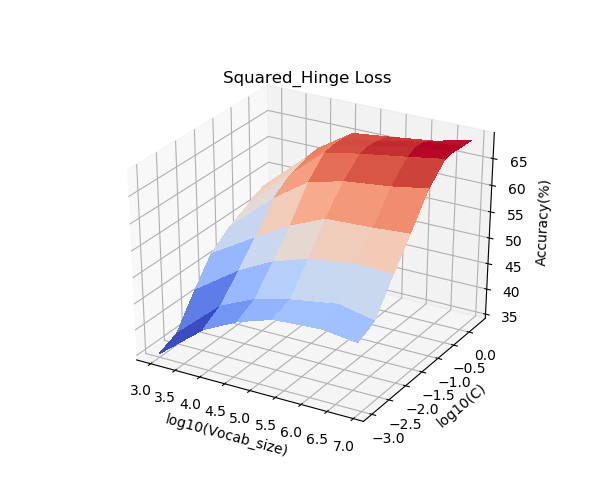

In [31]:
fig = plt.figure(figsize=(6,5))

ax11=fig.add_subplot(111,projection='3d')
X, Y, Z = extract_grid(test_score,cat = 'squared_hinge')
ax11.plot_surface(np.log(X), np.log10(Y), Z, cmap=plt.cm.coolwarm, linewidth=2, antialiased=False)
ax11.set_title('Squared_Hinge Loss')
ax11.set_xlabel('log10(Vocab_size)'); ax11.set_ylabel('log10(C)'), ax11.set_zlabel('Accuracy(%)'); plt.show()

<IPython.core.display.Javascript object>


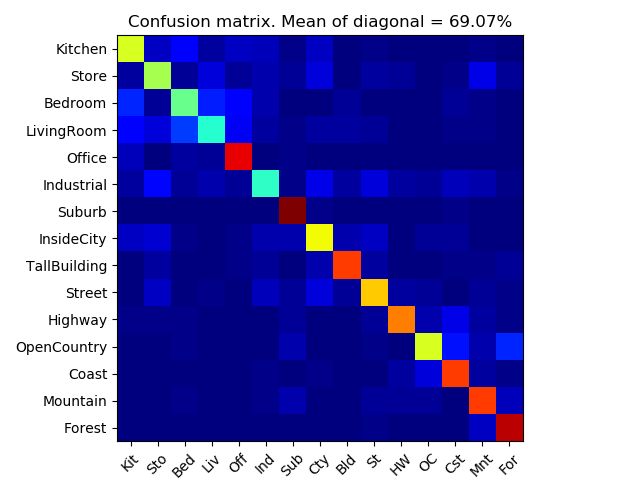

In [32]:
predicted_categories = sc.svm_classify(train_image_feats, train_labels, test_image_feats,
                                                      tol=1e-3, loss='squared_hinge', C=0.5)
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)